# Customer Churn Data Science Project

Dataset: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

## Preparations

We will first import a few libraries and our data. We will be using pandas and scikit learn for this project.

In [106]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
df = pd.read_csv("data.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


## Data Cleaning

In [107]:
# Check missing values & Dtype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [108]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


<Axes: >

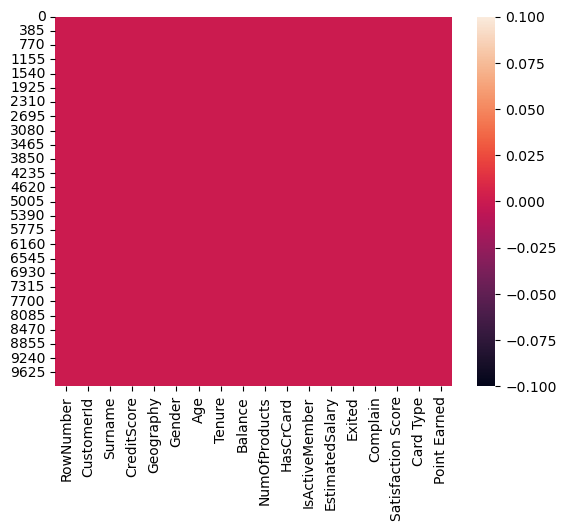

In [109]:
sns.heatmap(df.isnull())

In [110]:
# Delete blanks before and after the column name
df.columns = df.columns.str.strip()

In [111]:
columns_to_exclude = ["Surname", "RowNumber", "CustomerId"]
df.drop(columns=columns_to_exclude, inplace=True)

In [112]:
# Assign card type with numerical values
def card_type_value(card_type):
    if card_type == 'DIAMOND':
        return 0
    elif card_type == 'PLATINUM':
        return 1
    elif card_type == 'GOLD':
        return 2
    else:
        return 3

In [113]:
df["Card Type"] = df["Card Type"].apply(card_type_value)

In [114]:
# Create a seperate categorical variables dataframe
categorical_columns = ["Tenure", "Geography", "Gender", "NumOfProducts", "HasCrCard",
                       "IsActiveMember", "Exited", "Complain", "Satisfaction Score", "Card Type"]
categorical_variables = df[categorical_columns]

In [115]:
# Check the unique value for each categorical variable and sort them
unique_value = {c: sorted(list(df[c].unique()))
                for c in categorical_variables.columns}
pprint(unique_value)

{'Card Type': [0, 1, 2, 3],
 'Complain': [0, 1],
 'Exited': [0, 1],
 'Gender': ['Female', 'Male'],
 'Geography': ['France', 'Germany', 'Spain'],
 'HasCrCard': [0, 1],
 'IsActiveMember': [0, 1],
 'NumOfProducts': [1, 2, 3, 4],
 'Satisfaction Score': [1, 2, 3, 4, 5],
 'Tenure': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


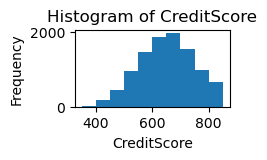

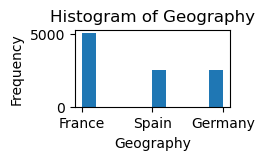

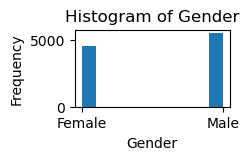

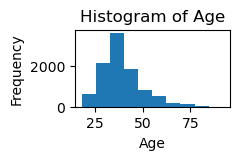

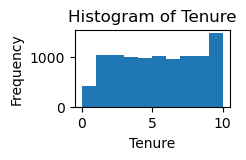

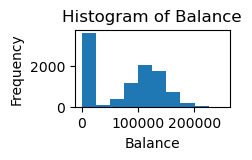

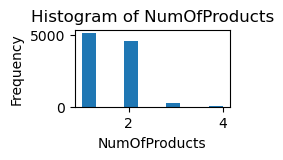

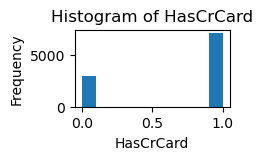

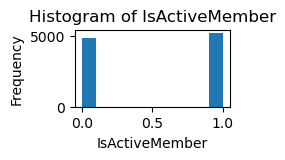

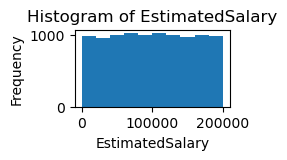

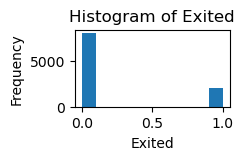

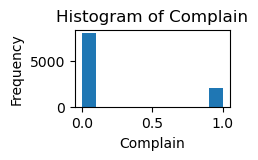

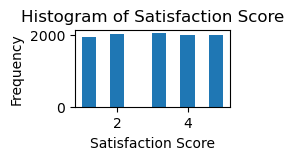

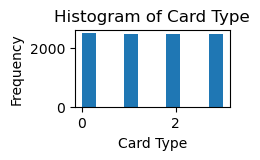

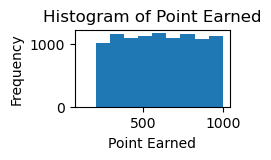

In [137]:
# Create histograms for each numerical column
for col in df.columns:
    plt.figure(figsize=(2, 1))
    plt.hist(df[col])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<Axes: xlabel='Exited'>

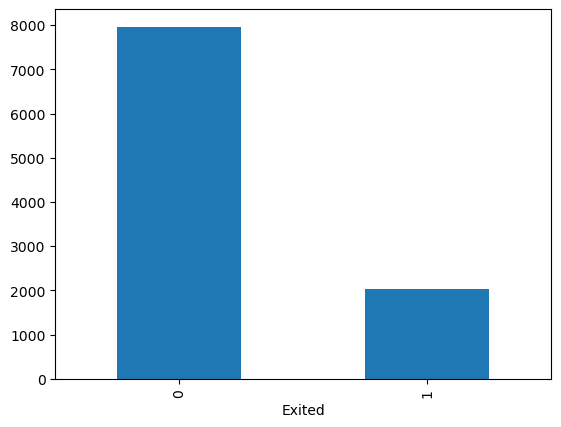

In [117]:
# Visualize the response variable
df["Exited"] = df["Exited"].astype("category", copy=False)
df["Exited"].value_counts().plot(kind="bar")

In [127]:
# check the counts for each unique of Geography column
df['Geography'].value_counts(normalize=True)

Geography
France     0.5014
Germany    0.2509
Spain      0.2477
Name: proportion, dtype: float64

In [128]:
# check the counts for each unique of Gender column
df['Gender'].value_counts(normalize=True)

Gender
Male      0.5457
Female    0.4543
Name: proportion, dtype: float64

In [118]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
encoder = OneHotEncoder(drop="first", sparse=False)

# Apply encoding only to the specified columns
encoded_cols = encoder.fit_transform(df[["Geography", "Gender"]])
encoded_col_names = encoder.get_feature_names_out(["Geography", "Gender"])

# Combine encoded columns with the rest of the DataFrame
df_encoded = pd.concat(
    [pd.DataFrame(encoded_cols, columns=encoded_col_names,
                  index=df.index),
     df.drop(["Geography", "Gender"], axis=1)],
    axis=1
)
df_encoded

/Users/luoyihang/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Geography_Germany,Geography_Spain,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,0.0,0.0,0.0,619,42,2,0.00,1,1,1,101348.88,1,1,2,0,464
1,0.0,1.0,0.0,608,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456
2,0.0,0.0,0.0,502,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377
3,0.0,0.0,0.0,699,39,1,0.00,2,0,0,93826.63,0,0,5,2,350
4,0.0,1.0,0.0,850,43,2,125510.82,1,1,1,79084.10,0,0,5,2,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,771,39,5,0.00,2,1,0,96270.64,0,0,1,0,300
9996,0.0,0.0,1.0,516,35,10,57369.61,1,1,1,101699.77,0,0,5,1,771
9997,0.0,0.0,0.0,709,36,7,0.00,1,0,1,42085.58,1,1,3,3,564
9998,1.0,0.0,1.0,772,42,3,75075.31,2,1,0,92888.52,1,1,2,2,339


In [119]:
# Divide into response variable and predictors
y = df_encoded["Exited"] # Response
X = df_encoded.drop(["Exited"], axis=1) # Predicted Variables

In [131]:
X

,Geography_Germany,Geography_Spain,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,0.0,0.0,0.0,619,42,2,0.00,1,1,1,101348.88,1,2,0,464
1,0.0,1.0,0.0,608,41,1,83807.86,1,0,1,112542.58,1,3,0,456
2,0.0,0.0,0.0,502,42,8,159660.80,3,1,0,113931.57,1,3,0,377
3,0.0,0.0,0.0,699,39,1,0.00,2,0,0,93826.63,0,5,2,350
4,0.0,1.0,0.0,850,43,2,125510.82,1,1,1,79084.10,0,5,2,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,1.0,771,39,5,0.00,2,1,0,96270.64,0,1,0,300
9996,0.0,0.0,1.0,516,35,10,57369.61,1,1,1,101699.77,0,5,1,771
9997,0.0,0.0,0.0,709,36,7,0.00,1,0,1,42085.58,1,3,3,564
9998,1.0,0.0,1.0,772,42,3,75075.31,2,1,0,92888.52,1,2,2,339


## Normalize the data

In [120]:
from sklearn.preprocessing import StandardScaler

# create a scale object
scaler = StandardScaler()

# fit the scaler to the data and transform the data
X_scaled = scaler.fit_transform(X)

## Split the data

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

## Train the model

In [122]:
from sklearn.linear_model import LogisticRegression

# create the lr model
lr = LogisticRegression(class_weight='balanced')

# train the model on the training data
lr.fit(X_train, y_train)

# predict the target variable on test data
y_pred = lr.predict(X_test)

In [123]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [124]:
print(y_test)

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
8014    0
1074    0
3063    0
6487    0
4705    0
Name: Exited, Length: 3000, dtype: category
Categories (2, int64): [0, 1]


## Evaluation of the Model

In [125]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy: .2f}")


Accuracy:  1.00


In [94]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2416
           1       0.99      1.00      1.00       584

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

